In [1]:
import glob
import joblib

In [2]:
from utils import convert_episodes_to_traj_class

In [3]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

In [4]:
from decision_bias_analysis_tools import ComputeFourBiasClips2
from parameters import EXPLORE, HOME_NODE, UnrewNamesSub
import evaluation_metrics as em

In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.size"] = 18

In [148]:
def load(model_name):
    if model_name == 'Animals':
        tfs = [LoadTrajFromPath(f'../outdata/{_}-tf') for _ in UnrewNamesSub]
        return tfs
    
#     if model_name == 'RandomWalk':
#         tfs = [LoadTrajFromPath('../outdata/rw01-tf')]
#         return tfs

    tfs = []
    for f in glob.glob(f'/Users/us3519/mouse-maze/figs/may28/{model_name}/MAX_LENGTH=50000/**/episodes_*.pkl'):
        s = joblib.load(f)
        tf = convert_episodes_to_traj_class(s["episodes_positions"], s["episodes_states"])
        tfs.append(tf)
    return tfs

In [88]:
def get_biases(tfs):
    bi = np.array([ComputeFourBiasClips2(tf,ma,SplitModeClips(tf,ma),mode=EXPLORE)[0] for tf in tfs]) # bias using exploration only
    return bi

In [186]:
from collections import OrderedDict

[(0.13127258746635911, 0.19295655517108803, 0.5517877739331027, 1.0), (0.1361937716262976, 0.32858131487889275, 0.6397539407920031, 1.0), (0.12026143790849673, 0.5019607843137255, 0.7215686274509804, 1.0), (0.19068050749711646, 0.6477201076509035, 0.7614917339484814, 1.0), (0.3655055747789312, 0.7547558631295656, 0.7525720876585928, 1.0), (0.592156862745098, 0.8405228758169935, 0.7241830065359477, 1.0), (0.8166243752402922, 0.9280276816608997, 0.7030219146482123, 1.0), (0.9379930795847751, 0.9758861976163014, 0.7131872356785851, 1.0), (1.0, 1.0, 0.8509803921568627, 1.0)]


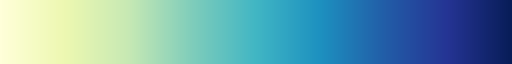

In [351]:
cmap = plt.get_cmap('YlGnBu')
colors = [cmap(i / 9) for i in range(9)][::-1]
print(colors)
models = [
    'TeAltOptions1.01',
    'TeAltOptions1.25',
    'TeAltOptions1.5',
    'TeAltOptions1.75',
    'TeAltOptions2',
    'TeAltOptions2.25',
    'TeAltOptions2.5',
    'TeAltOptions2.75',
    'TeAltOptions3',
][::-1]
model_colors = OrderedDict([(m, colors[i]) for i, m in enumerate(models)])
default_model_colors = {
    'Optimal': 'k',
    'RandomWalk': 'b',
    'Animals': 'r',
}
all_model_colors = {}
all_model_colors.update(default_model_colors)
all_model_colors.update(model_colors)
cmap

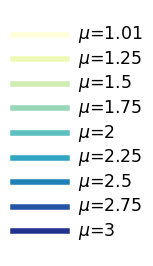

In [228]:
fig, ax = plt.subplots(figsize=(2, 3))

for i, m in enumerate(model_colors):
    if 'TeAltOptions' in m:
        label = ("$\mu$=" + m.split('TeAltOptions')[1])
    else:
        continue
    ax.plot([0, 1], [i, i], c=model_colors[m], linewidth=4)
    ax.text(1.2, i, label, va='center', fontsize='x-small')

ax.set_ylim(-1, len(model_colors))
ax.axis('off')
plt.tight_layout()
plt.savefig(f'{figpath}/legend_mu.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

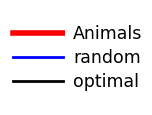

In [518]:
fig, ax = plt.subplots(figsize=(2, 1.5))

ax.plot([0, 1], [2, 2], c=default_model_colors['Animals'], linewidth=4)
ax.text(1.2, 2, 'Animals', va='center', fontsize='x-small')

ax.plot([0, 1], [1, 1], c=default_model_colors['RandomWalk'], linewidth=2)
ax.text(1.2, 1, 'random', va='center', fontsize='x-small')

ax.plot([0, 1], [0, 0], c=default_model_colors['Optimal'], linewidth=2)
ax.text(1.2, 0, 'optimal', va='center', fontsize='x-small')

ax.set_ylim(-1, len(default_model_colors))
ax.axis('off')
plt.tight_layout()
plt.savefig(f'{figpath}/legend_default.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [194]:
figpath = '/Users/us3519/mouse-maze/figs/paper figs/figure_altoptions_mu'
# os.makedirs(figpath, exist_ok=True)

In [127]:
ma=NewMaze()

In [128]:
bi_animals = get_biases(load('Animals'))

In [129]:
bi_randomwalk = np.array([[2/3, 1/2, 2/3, 1/2]])

In [130]:
model_colors

{'TeAltOptions1.25': (0.19215686274509805,
  0.5098039215686274,
  0.7411764705882353,
  1.0),
 'TeAltOptions1.5': (0.6196078431372549,
  0.792156862745098,
  0.8823529411764706,
  1.0),
 'TeAltOptions1.75': (0.9019607843137255,
  0.3333333333333333,
  0.050980392156862744,
  1.0),
 'TeAltOptions2': (0.19215686274509805,
  0.6392156862745098,
  0.32941176470588235,
  1.0),
 'TeAltOptions2.25': (0.6313725490196078,
  0.8509803921568627,
  0.6078431372549019,
  1.0),
 'TeAltOptions2.5': (0.4588235294117647,
  0.4196078431372549,
  0.6941176470588235,
  1.0),
 'TeAltOptions2.75': (0.7372549019607844,
  0.7411764705882353,
  0.8627450980392157,
  1.0),
 'TeAltOptions3': (0.38823529411764707,
  0.38823529411764707,
  0.38823529411764707,
  1.0)}

In [242]:
def compute_biases(models):
    biases = {}
    for model_name in models:
        print(model_name)
        if model_name in ['Optimal', 'RandomWalk']:
            continue
        bi = get_biases(load(model_name))
        biases[model_name] = bi
    return biases

# biases_dict = compute_biases(model_colors)

In [ ]:
biases_dict = compute_biases(model_colors)

TeAltOptions3
TeAltOptions2.75
TeAltOptions2.5
TeAltOptions2.25
TeAltOptions2
TeAltOptions1.75
TeAltOptions1.5
TeAltOptions1.25
TeAltOptions1.01


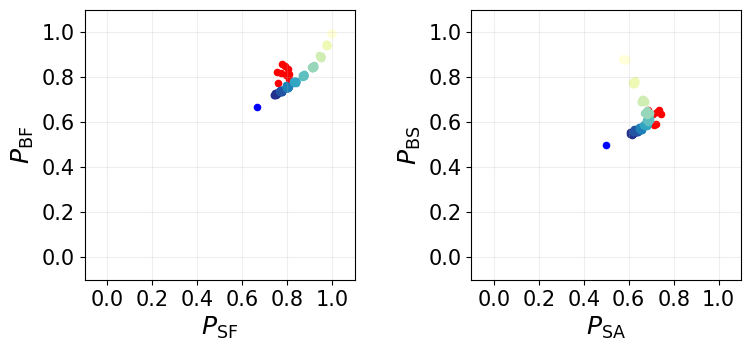

In [247]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3.8))

s = 20
alpha = 1

ax[0].scatter(bi_animals[:,0], bi_animals[:,2], color=default_model_colors["Animals"], label='Animals', s=s, alpha=1,)
ax[1].scatter(bi_animals[:,1], bi_animals[:,3], color=default_model_colors["Animals"], label='Animals', s=s, alpha=1,)

for model_name in model_colors:
    print(model_name)
    if model_name in ['Optimal', 'RandomWalk']:
        continue
    bi = biases_dict[model_name]
    ax[0].scatter(bi[:,0], bi[:,2], color=model_colors[model_name], label=model_name, s=s, alpha=alpha,)
    ax[1].scatter(bi[:,1], bi[:,3], color=model_colors[model_name], label=model_name, s=s, alpha=alpha,)


ax[0].scatter(bi_randomwalk[:,0], bi_randomwalk[:,2], color=default_model_colors["RandomWalk"], label='random',s=s, alpha=1,)
ax[1].scatter(bi_randomwalk[:,1], bi_randomwalk[:,3], color=default_model_colors["RandomWalk"], label='random',s=s, alpha=1,)

for _ in ax:
    _.tick_params(axis='both', labelsize='small')
    _.set_aspect('equal')
    _.set_xlim([-0.1,1.1])
    _.set_ylim([-0.1,1.1])
    _.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    _.grid(alpha=0.2)

# ax[0].legend(loc='lower left', fontsize='x-small') 
# ax[1].legend(loc='lower left', fontsize='x-small') 
ax[0].set_xlabel('$P_{\mathrm{SF}}$', fontsize='medium')
ax[0].set_ylabel('$P_{\mathrm{BF}}$', fontsize='medium')
ax[1].set_xlabel('$P_{\mathrm{SA}}$', fontsize='medium')
ax[1].set_ylabel('$P_{\mathrm{BS}}$', fontsize='medium')


plt.tight_layout()
plt.savefig(f'{figpath}/decisionbiases.pdf', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [139]:
def get_expeff(tfs, le=6):
    y_tfs = []
    for tf in tfs:
        wcn=NewNodesMerge3(tf,ma,le) 
        x=wcn[1]
        y=wcn[2]
        y_tfs.append(y)

    min_len = min(len(_) for _ in y_tfs)
    y_tfs = np.array([_[:min_len] for _ in y_tfs])  # some tfs might not have all window sizes
    y_mu = np.mean(y_tfs, axis=0)
    y_std = np.std(y_tfs, axis=0)
    return x[:min_len], y_tfs, y_mu, y_std

In [140]:
def get_ee(model_names, le):
    ee_dict = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        tfs = load(model_name)[:30]
        print("len(tfs)", len(tfs))
        ee_dict[model_name] = get_expeff(tfs, le=le)
    return ee_dict

In [162]:
def plot_ee(exp_eff_dict, le, filename, figsize=(8, 4), axhline=32, xlim=(2, 2*(10**3)), ylim=(0, 2**6+2), labelpad=10):
    x_dfs=list(range(1, (2**le)+1))
    y_dfs=list(range(1, (2**le)+1))

    plt.figure(figsize=figsize)
    ax = plt.gca()

    for model_name in exp_eff_dict:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal']:
            continue
        xyy = exp_eff_dict.get(model_name, None)
        if not xyy: continue
        x, _, y_mu, y_std = xyy
        linewidth = 3 if model_name == 'Animals' else 1
        alpha = 1
        label = model_name
        if model_name == 'RandomWalk':
            linewidth = 0.5
            alpha = 0.8
            label = 'random'
        plt.plot(x, y_mu, c=all_model_colors[model_name], linestyle='-',linewidth=linewidth, label=label, alpha=alpha)
        if model_name != 'RandomWalk':
            ax.fill_between(x, y_mu+y_std, y_mu-y_std, color=all_model_colors[model_name], alpha=0.2)

    plt.plot(x_dfs,y_dfs,'k',linewidth=0.7, alpha=0.4, label='optimal')

    plt.axhline(axhline, ls=':', c='k')
#     plt.legend(loc='lower right', fontsize='x-small')
    ax.tick_params(axis='both', labelsize='small')
    ax.set_xlabel(f'Nodes visited (Level {le})', fontsize='medium')
    ax.set_ylabel(f'New nodes found\n(Level {le})', fontsize='medium', labelpad=labelpad)
    plt.xscale('log')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    plt.savefig(f'{figpath}/{filename}', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

RandomWalk
Animals
TeAltOptions3
TeAltOptions2.75
TeAltOptions2.5
TeAltOptions2.25
TeAltOptions2
TeAltOptions1.75
TeAltOptions1.5
TeAltOptions1.25
TeAltOptions1.01


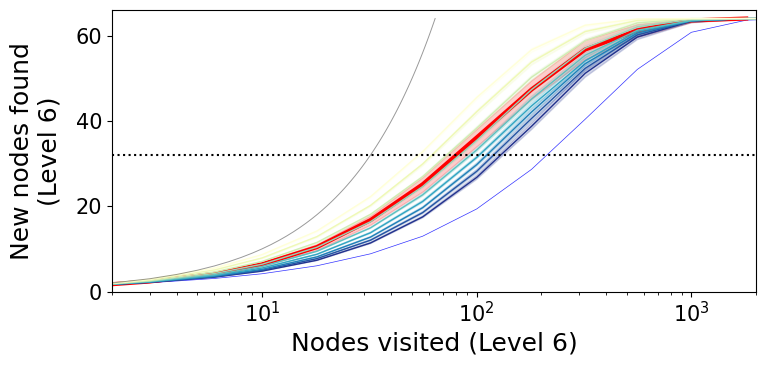

In [254]:
# exp_eff_dict6 = get_ee(all_model_colors, 6)
plot_ee(exp_eff_dict6, 6, filename='exp_eff_le6_mu.pdf', figsize=(8, 4))

RandomWalk
Animals
TeAltOptions3
TeAltOptions2.75
TeAltOptions2.5
TeAltOptions2.25
TeAltOptions2
TeAltOptions1.75
TeAltOptions1.5
TeAltOptions1.25
TeAltOptions1.01


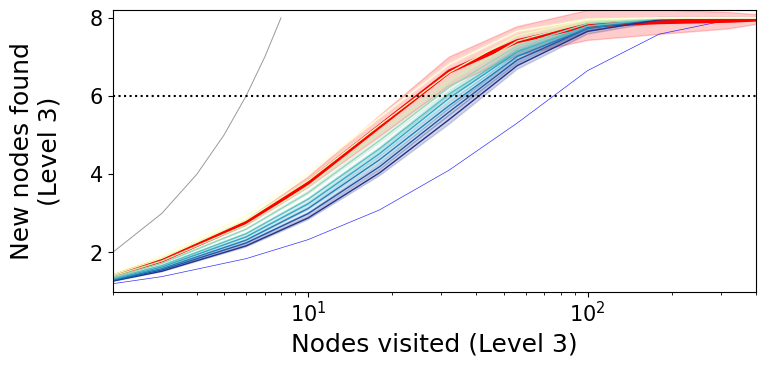

In [253]:
# exp_eff_dict3 = get_ee(all_model_colors, 3)
plot_ee(exp_eff_dict3, 3, filename='exp_eff_le3_mu.pdf', figsize=(8, 4), axhline=6, xlim=(2, 400), ylim=(1, 2**3+0.2), labelpad=20)

In [255]:
def get_oiratio(tfs):
    return [em.outside_inside_ratio(tf, re=False) for tf in tfs]

In [272]:
def get_oi(model_names):
    oi_dict = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal', 'RandomWalk']:
            continue
#         elif model_name in ['BiasedWalk4']:
#             Vuw = animal_oi()[len(p.RewNames):]
#             ratios = [np.mean(a[outer])/np.mean(a[inner]) for a in Vuw]
#             oi_dict[model_name] = ratios
        else:
            tfs = load(model_name)[:30]
            print("len(tfs)", len(tfs))
            oi_dict[model_name] = get_oiratio(tfs)
    return oi_dict

In [275]:
oi_ratios_dict = get_oi(all_model_colors)
# del oi_ratios_dict['RandomWalk']

Optimal
RandomWalk
Animals
len(tfs) 9
TeAltOptions3
len(tfs) 20
TeAltOptions2.75
len(tfs) 20
TeAltOptions2.5
len(tfs) 20
TeAltOptions2.25
len(tfs) 20
TeAltOptions2
len(tfs) 20
TeAltOptions1.75
len(tfs) 20
TeAltOptions1.5
len(tfs) 20
TeAltOptions1.25
len(tfs) 20
TeAltOptions1.01
len(tfs) 20


In [276]:
oi_ratios_dict.keys()

dict_keys(['Animals', 'TeAltOptions3', 'TeAltOptions2.75', 'TeAltOptions2.5', 'TeAltOptions2.25', 'TeAltOptions2', 'TeAltOptions1.75', 'TeAltOptions1.5', 'TeAltOptions1.25', 'TeAltOptions1.01'])

In [277]:
from scipy.stats import sem

In [511]:
def plot_oi(oi_ratios_dict, filename):
    plt.figure(figsize=(5, 3.5))
    ax = plt.gca()
    xticks = []
    for i, model_name in enumerate(['Animals'] + models[::-1]):
        print(model_name)
        ratios = oi_ratios_dict[model_name][:10]
        jitter = np.random.uniform(-0.05, 0.05, size=len(ratios))
        mean_ratio = np.mean(ratios)
        print("mean_ratio", mean_ratio)
        plt.bar(i/2, mean_ratio, yerr=sem(ratios), color=all_model_colors[model_name], width=0.3, capsize=2, alpha=0.8, label=model_name)
        label = model_name.split('TeAltOptions')[-1] if 'TeAltOptions' in model_name else model_name
        xticks.append(label)

    plt.axhline(1, ls=':', c=all_model_colors['RandomWalk'], lw=2, label='random')
    
#     plt.xticks(range(len(xticks)), xticks, rotation=0)
    plt.xticks([])
    ax.tick_params(axis='both', labelsize='x-small')
    plt.ylabel('Outgoing Tendency', fontsize='medium')
#     plt.xlabel(r'$\mu$', fontsize='medium')
#     plt.legend(loc='upper right', fontsize='xx-small')
    plt.margins(0.1)
    plt.tight_layout()
    plt.savefig(f'{figpath}/{filename}', dpi=300, transparent=True, bbox_inches='tight')
    plt.show()
    return

Animals
mean_ratio 2.3014239785230157
TeAltOptions1.01
mean_ratio 1.6457006428159304
TeAltOptions1.25
mean_ratio 1.9531572129327177
TeAltOptions1.5
mean_ratio 2.3463092385582485
TeAltOptions1.75
mean_ratio 2.4294117179714645
TeAltOptions2
mean_ratio 2.498427820273561
TeAltOptions2.25
mean_ratio 2.295622119562478
TeAltOptions2.5
mean_ratio 2.074837947488412
TeAltOptions2.75
mean_ratio 1.8222837029442538
TeAltOptions3
mean_ratio 1.6883369777732802


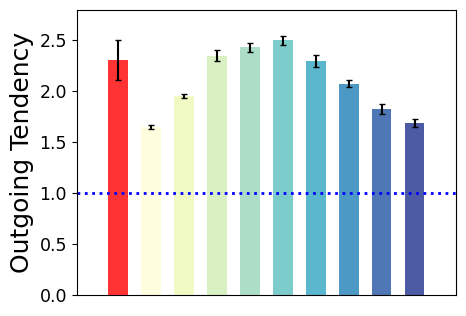

In [512]:
# oi_ratios_dict_randomopt = get_oi(['Animals', 'TeAltOptions', 'TeRandomActionOptions'])
plot_oi(oi_ratios_dict, filename='oiratio_mu.pdf')

In [284]:
from collections import defaultdict
import parameters as p


In [286]:
def get_firstnode(tfs):
    dicts = [em.first_endnode_label(tf) for tf in tfs]
    merged = defaultdict(list)
    for d in dicts:
        for k, v in d.items():
            merged[k].append(v)
    return merged

def get_firstnode_dict(model_names):
    firstnode_dict = {}
    for model_name in model_names:
        print(model_name)
        if model_name in ['MarkovChain', 'Optimal', 'RandomWalk']:
            continue
        elif model_name in ['Animals']:
            with open(p.OUTDATA_PATH + 'first_endnode_label_unrewarded.pkl', 'rb') as f:
                first_endnode_label_animal = pickle.load(f)
            firstnode_dict[model_name] = first_endnode_label_animal
        else:
            tfs = load(model_name)[:10]
            print("len(tfs)", len(tfs))
            firstnode_dict[model_name] = get_firstnode(tfs)
    return firstnode_dict

In [472]:
def plot_firstnodetype(firstnode_dict, filename):
    fig = plt.figure(figsize=(7, 3.9))
    ax = plt.gca()

    for m, model_name in enumerate(['Animals'] + models[::-1]):
        values_dict = firstnode_dict[model_name]
        new_values_dict = {'str': values_dict['straight'], 'opp': values_dict['opposite straight'], 'bent': values_dict['bent straight'], 'opp\nbent': values_dict['opposite bent straight']}
        for i, t in enumerate(new_values_dict):
            data = np.array(new_values_dict[t])
    #         print(m, i, data, f'{round(np.mean(data), 3)}\% \pm {round(sem(data), 3)}\%')
            plt.bar(i+m*0.08, np.mean(data), color=all_model_colors[model_name], yerr=sem(data), 
                   label=model_name if i == 0 else '', capsize=2, width=0.08, alpha=0.9)

    plt.axhline(25, c=all_model_colors['RandomWalk'], ls=':', lw=2, label='random')

#     ax.legend(fontsize='x-small')
    ax.set_ylabel('% of first node types', fontsize='medium')
    ax.set_yticks([0, 25, 50, 75])
    ax.set_xticks(np.arange(len(new_values_dict))+0.3, list(new_values_dict.keys()))
    ax.tick_params(axis='x', labelsize='small', length=0)
    ax.tick_params(axis='y', labelsize='small')
    plt.tight_layout()

    plt.savefig(f'{figpath}/{filename}', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    return

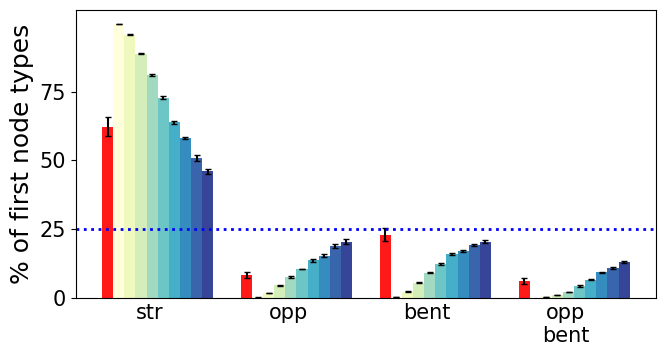

In [473]:
# firstnode_dict = get_firstnode_dict(all_model_colors)
plot_firstnodetype(firstnode_dict, 'firstnodetype_mu.pdf')

In [417]:
mu_values = [float(_.split('TeAltOptions')[-1]) for _ in models][::-1]
data_mu = {}
for i, mu in enumerate(mu_values):
    data_mu[mu] = np.random.zipf(a=mu, size=100000)

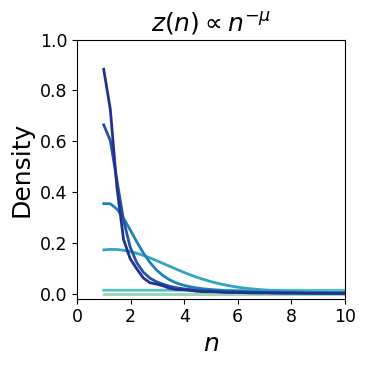

In [508]:
import seaborn as sns

plt.figure(figsize=(4,4))
for i, mu in enumerate(mu_values):
    sns.kdeplot(data_mu[mu], label=rf'$\mu={mu}$', color=colors[::-1][i], 
                bw_adjust=1.5, 
                clip=(1, 50), linewidth=2,
               )

plt.xlim(0, 10)
plt.xlabel(r'$n$', fontsize='medium')
plt.ylabel('Density', fontsize='medium')
# plt.title('Zipf distributions for various $\mu$', fontsize='medium')
# plt.legend(fontsize='x-small')
plt.title(r"$z(n) \propto n^{-\mu}$", fontsize='medium')
plt.tick_params(axis='both', labelsize='x-small')
plt.ylim(-0.02, 1)
plt.margins(0.05)

plt.tight_layout()
plt.savefig(f'{figpath}/zipf_mu.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
